# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [ ]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [ ]:
# Load the dataset
employee_df = pd.read_csv('/content/Employee_data.csv')
employee_df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [ ]:
# Inspect the shape of the dataset
employee_df.shape

(74610, 24)

In [ ]:
# Inspect the different columns in the dataset

employee_df.columns.tolist()
employee_df.dtypes

Employee ID                     int64
Age                             int64
Gender                         object
Years at Company                int64
Job Role                       object
Monthly Income                  int64
Work-Life Balance              object
Job Satisfaction               object
Performance Rating             object
Number of Promotions            int64
Overtime                       object
Distance from Home            float64
Education Level                object
Marital Status                 object
Number of Dependents            int64
Job Level                      object
Company Size                   object
Company Tenure (In Months)    float64
Remote Work                    object
Leadership Opportunities       object
Innovation Opportunities       object
Company Reputation             object
Employee Recognition           object
Attrition                      object
dtype: object

### **1.2 Check the basic statistics**

In [ ]:
# Check the summary of the dataset

employee_df.describe()


Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [ ]:
# Check the info to see the types of the feature variables and the null values present

employee_df.info()
print(employee_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [ ]:
# Check the number of missing values in each column
missing_values = employee_df.isnull().sum()
print(missing_values)


Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [ ]:
# Check the percentage of missing values in each column
missing_percentage = (employee_df.isnull().sum() / len(employee_df)) * 100
print(missing_percentage)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [ ]:
# Handle the missing value rows in the column
employee_df_clean = employee_df.dropna()
print("Shape before:", employee_df.shape)
print("Shape after dropping missing rows:", employee_df_clean.shape)


Shape before: (70635, 24)
Shape after dropping missing rows: (70635, 24)


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [ ]:
# Check the percentage of remaining data after missing values are removed
remaining_percentage = (len(employee_df_clean) / len(employee_df)) * 100
print(f"Remaining data after dropping missing values: {remaining_percentage:.2f}%")


Remaining data after dropping missing values: 100.00%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [ ]:
# Write a function to display the categorical columns with their unique values and check for redundant values

def inspect_categorical_columns(df):
    """
    Display unique values in categorical columns and check for redundant values.
    """
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        print(f"\nColumn: {col}")
        unique_vals = df[col].unique()
        print("Unique values:", unique_vals)
        print(f"Count of unique values: {len(unique_vals)}")

        normalized = df[col].str.strip().str.lower().unique()
        if len(unique_vals) != len(normalized):
            print("Redundant values detected.")
        else:
            print("No obvious redundancies.")



In [ ]:
# Check the data
file_path = "Employee_data.csv"
employee_df = pd.read_csv(file_path)
inspect_categorical_columns(employee_df)



Column: Gender
Unique values: ['Male' 'Female']
Count of unique values: 2
No obvious redundancies.

Column: Job Role
Unique values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Count of unique values: 5
No obvious redundancies.

Column: Work-Life Balance
Unique values: ['Excellent' 'Poor' 'Good' 'Fair']
Count of unique values: 4
No obvious redundancies.

Column: Job Satisfaction
Unique values: ['Medium' 'High' 'Very High' 'Low']
Count of unique values: 4
No obvious redundancies.

Column: Performance Rating
Unique values: ['Average' 'Low' 'High' 'Below Average']
Count of unique values: 4
No obvious redundancies.

Column: Overtime
Unique values: ['No' 'Yes']
Count of unique values: 2
No obvious redundancies.

Column: Education Level
Unique values: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
Count of unique values: 5
No obvious redundancies.

Column: Marital Status
Unique values: ['Married' 'Divorced' 'Single']
Count of unique values: 

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [ ]:
# Drop redundant columns which are not required for modelling
redundant_cols = ['Employee ID','Years at Company']  # you can add more if needed
employee_df_model = employee_df.drop(columns=redundant_cols)

print("Shape before:", employee_df.shape)
print("Shape after dropping redundant columns:", employee_df_model.shape)

Shape before: (74610, 24)
Shape after dropping redundant columns: (74610, 22)


In [ ]:
# Check first few rows of data
employee_df_model.head()


Age  Gender    Job Role  Monthly Income Work-Life Balance Job Satisfaction  \
0   31    Male   Education            5390         Excellent           Medium   
1   59  Female       Media            5534              Poor             High   
2   24  Female  Healthcare            8159              Good             High   
3   36  Female   Education            3989              Good             High   
4   56    Male   Education            4821              Fair        Very High   

  Performance Rating  Number of Promotions Overtime  Distance from Home  ...  \
0            Average                     2       No                22.0  ...   
1                Low                     3       No                21.0  ...   
2                Low                     0       No                11.0  ...   
3               High                     1       No                27.0  ...   
4            Average                     0      Yes                71.0  ...   

  Number of Dependents Job Level  Company Size Company Tenure (In Months)  \
0                    0       Mid        Medium                       89.0   
1                    3       Mid        Medium                       21.0   
2                    3       Mid        Medium                       74.0   
3                    2       Mid         Small                       50.0   
4                    0    Senior        Medium                       68.0   

  Remote Work  Leadership Opportunities Innovation Opportunities  \
0          No                        No                       No   
1          No                        No                       No   
2          No                        No                       No   
3         Yes                        No                       No   
4          No                        No                       No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed  

[5 rows x 22 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [ ]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [ ]:
# Put all the feature variables in X
X = employee_df_model.drop(columns=['Attrition'])
y = employee_df_model['Attrition']

print("Feature set shape (X):", X.shape)
print("\nFeature columns:\n", X.columns.tolist())

# Put the target variable in y
y = employee_df_model['Attrition']
print("Target shape (y):", y.shape)

Feature set shape (X): (74610, 21)

Feature columns:
 ['Age', 'Gender', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
Target shape (y): (74610,)


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [ ]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (52227, 21)
Validation set shape: (22383, 21)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [ ]:
# Select numerical columns
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

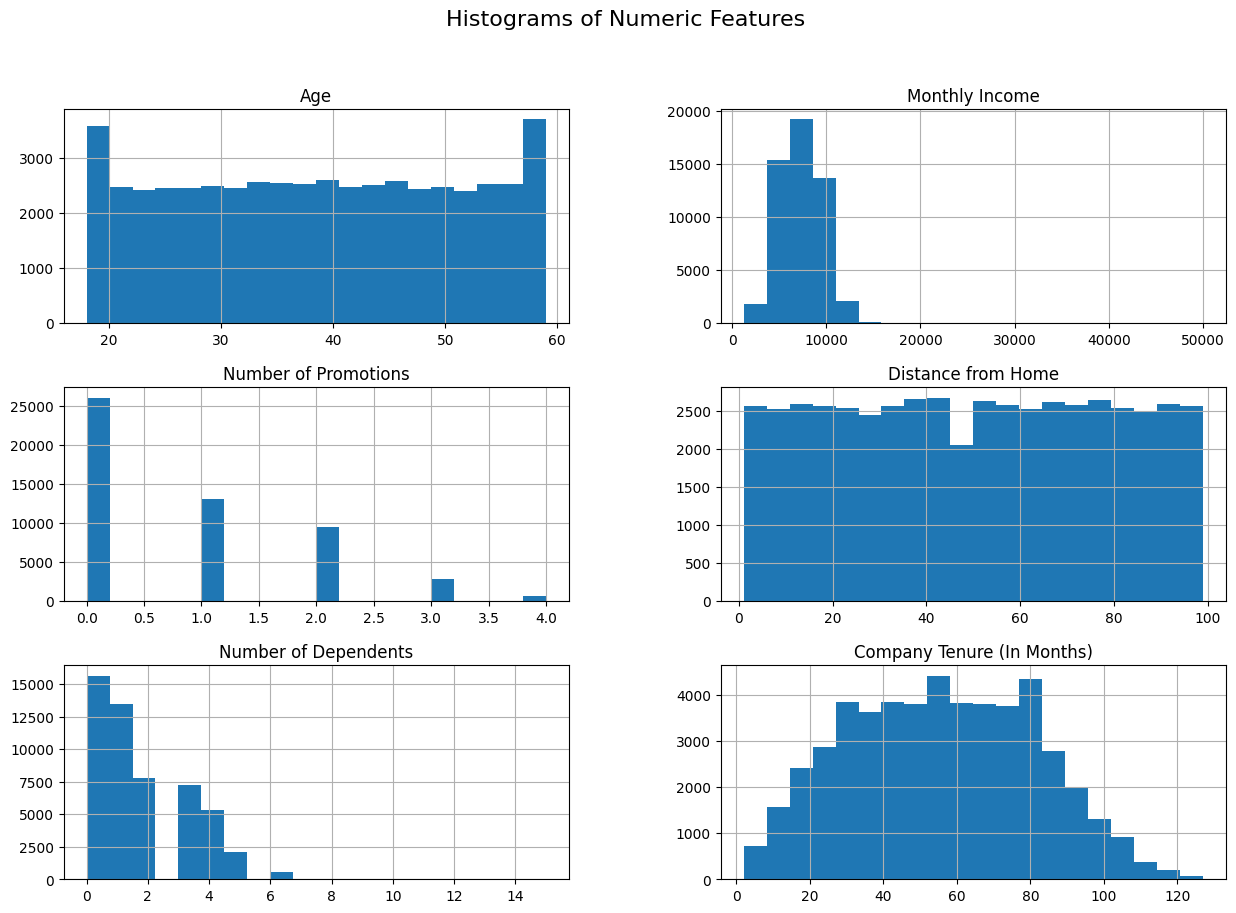

In [ ]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
X_train[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

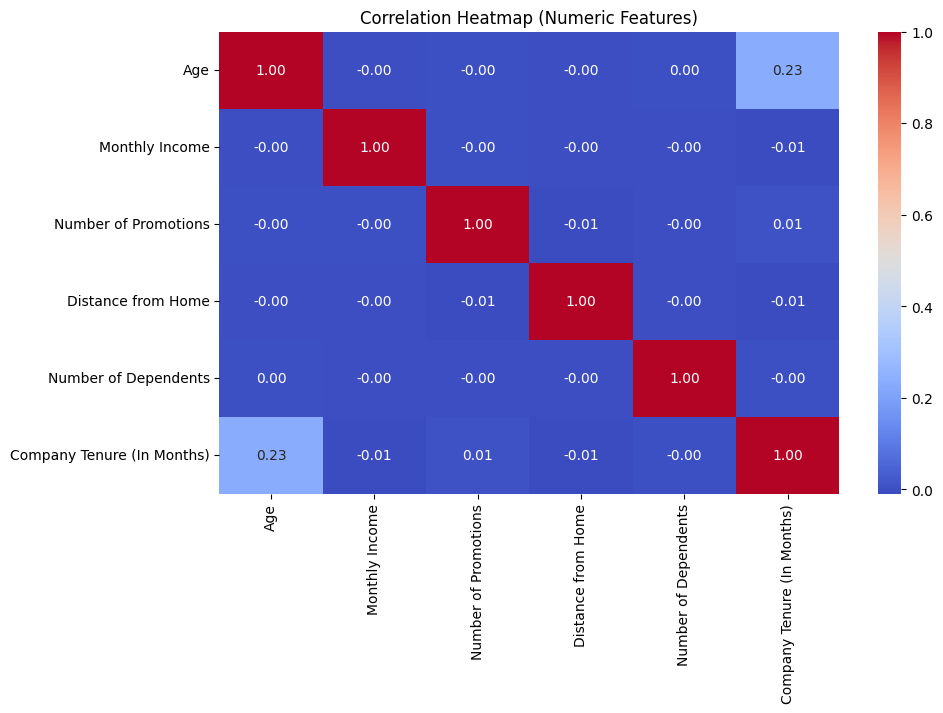

In [ ]:
# Create correlation matrix for numerical columns


# Plot Heatmap of the correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(X_train[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

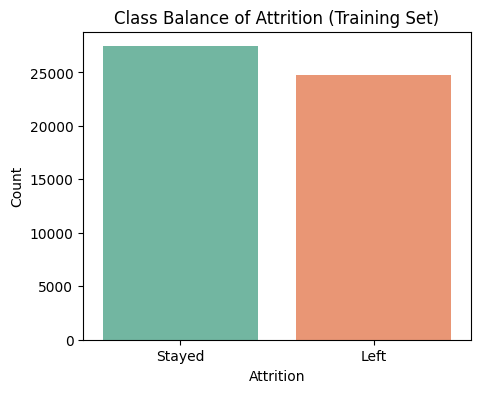

In [ ]:
# Plot a bar chart to check class balance

plt.figure(figsize=(5,4))
sns.countplot(x=y_train, palette="Set2")

plt.title("Class Balance of Attrition (Training Set)")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

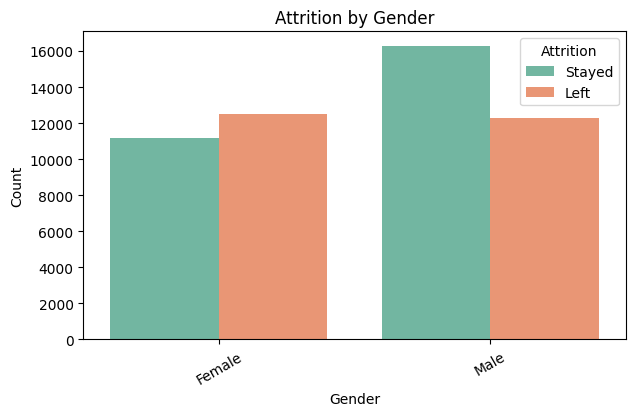

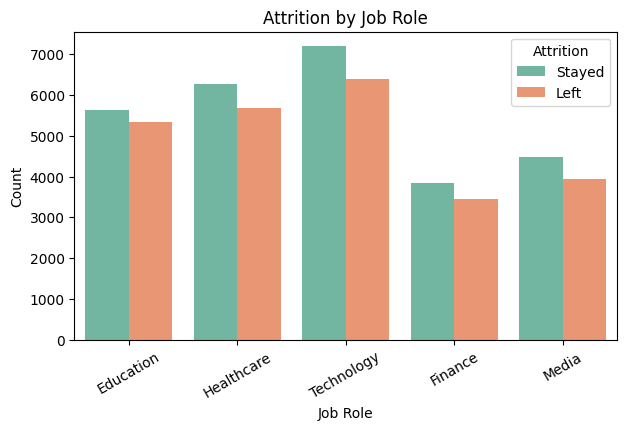

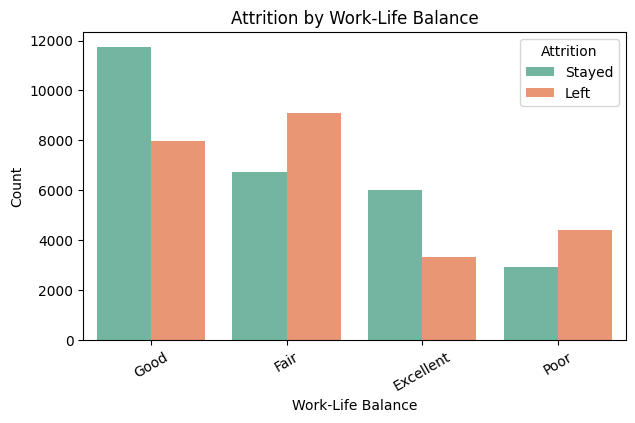

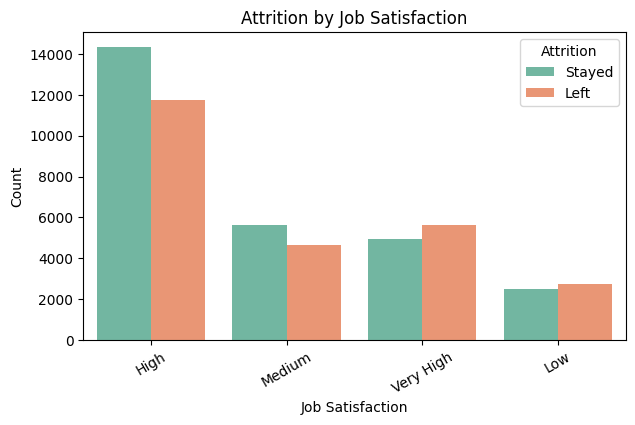

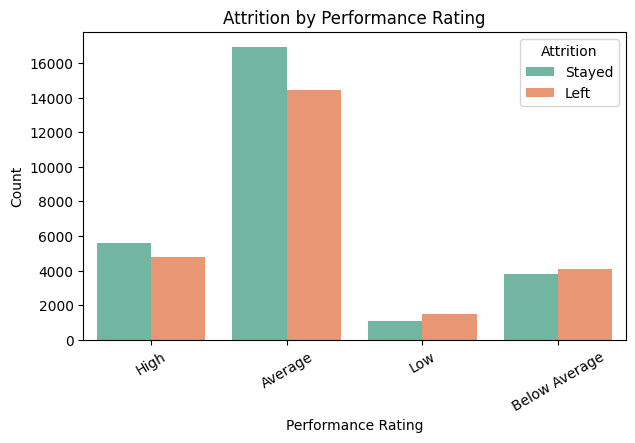

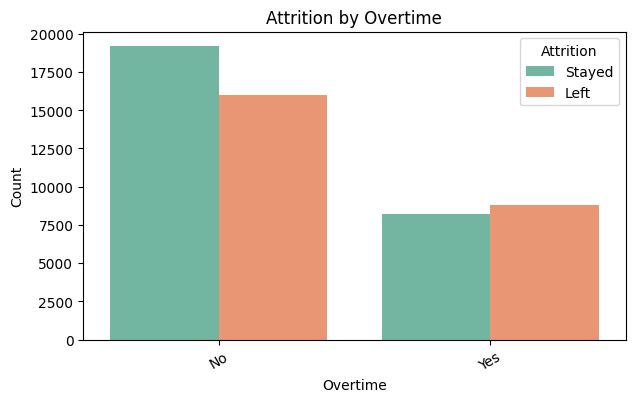

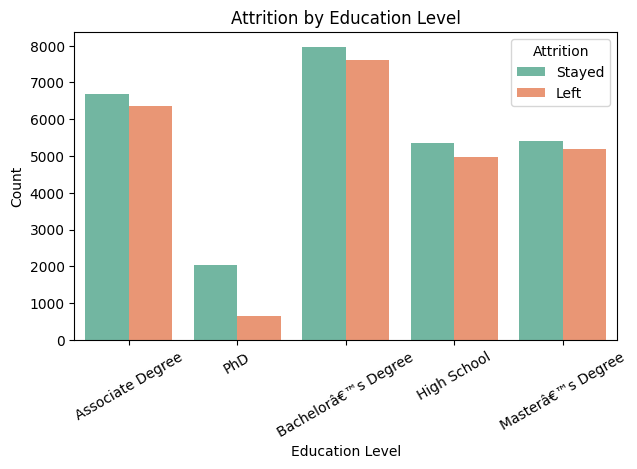

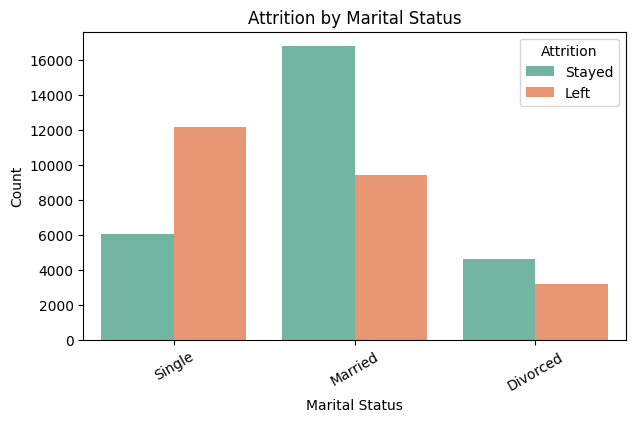

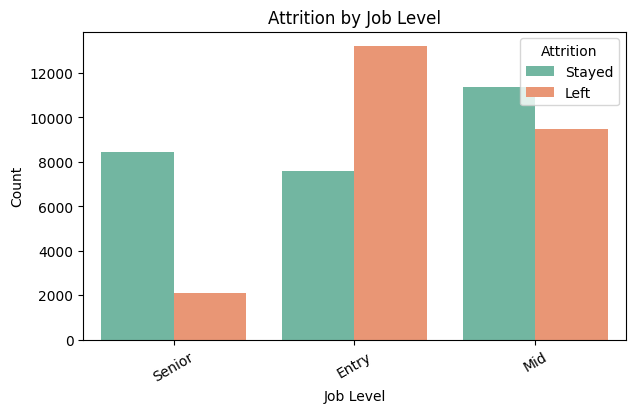

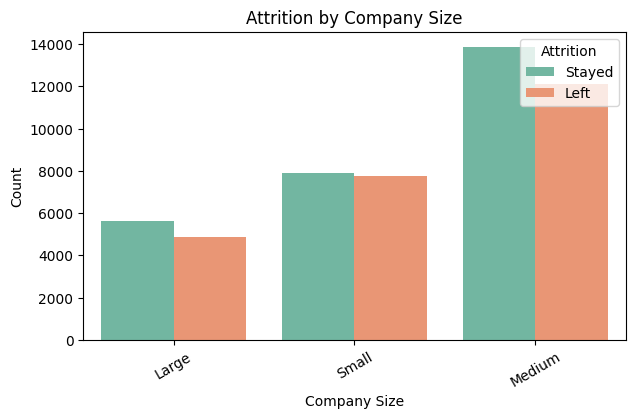

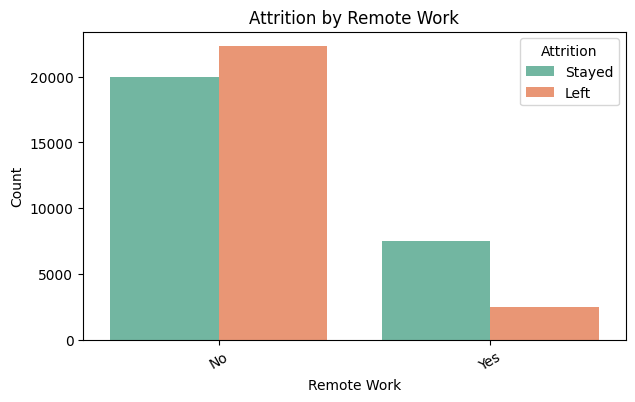

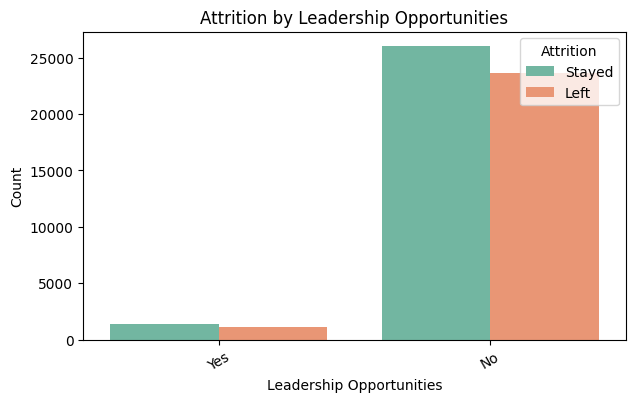

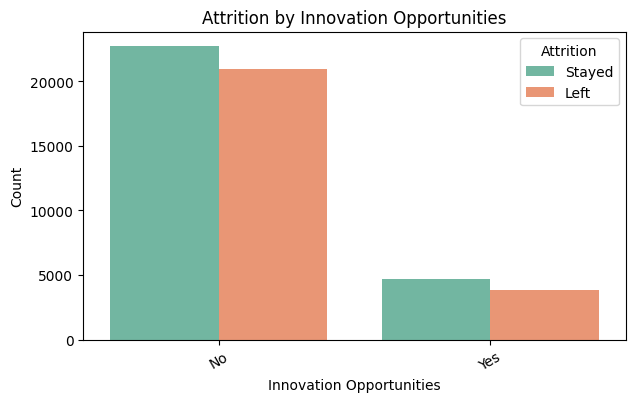

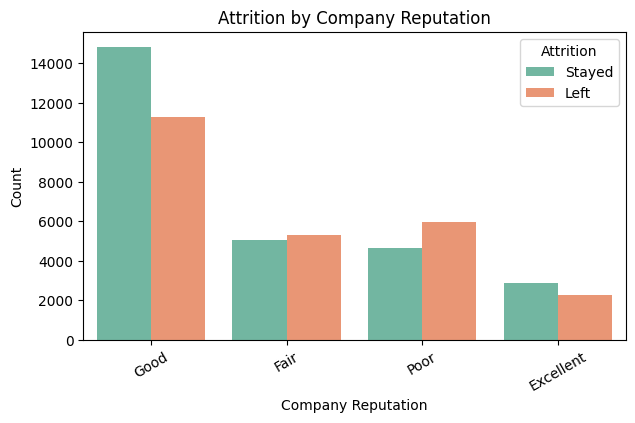

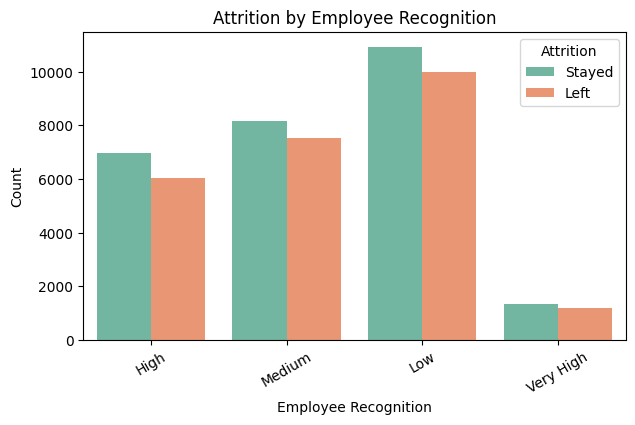

In [ ]:
# Plot distribution for each categorical column with target variable
categorical_cols = X_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=X_train, x=col, hue=y_train, palette="Set2")
    plt.title(f"Attrition by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.legend(title="Attrition", loc="upper right")
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [ ]:
# Select numerical columns
numeric_cols_val = X_val.select_dtypes(include=['int64', 'float64']).columns


5.1.2 Plot distribution of numerical columns

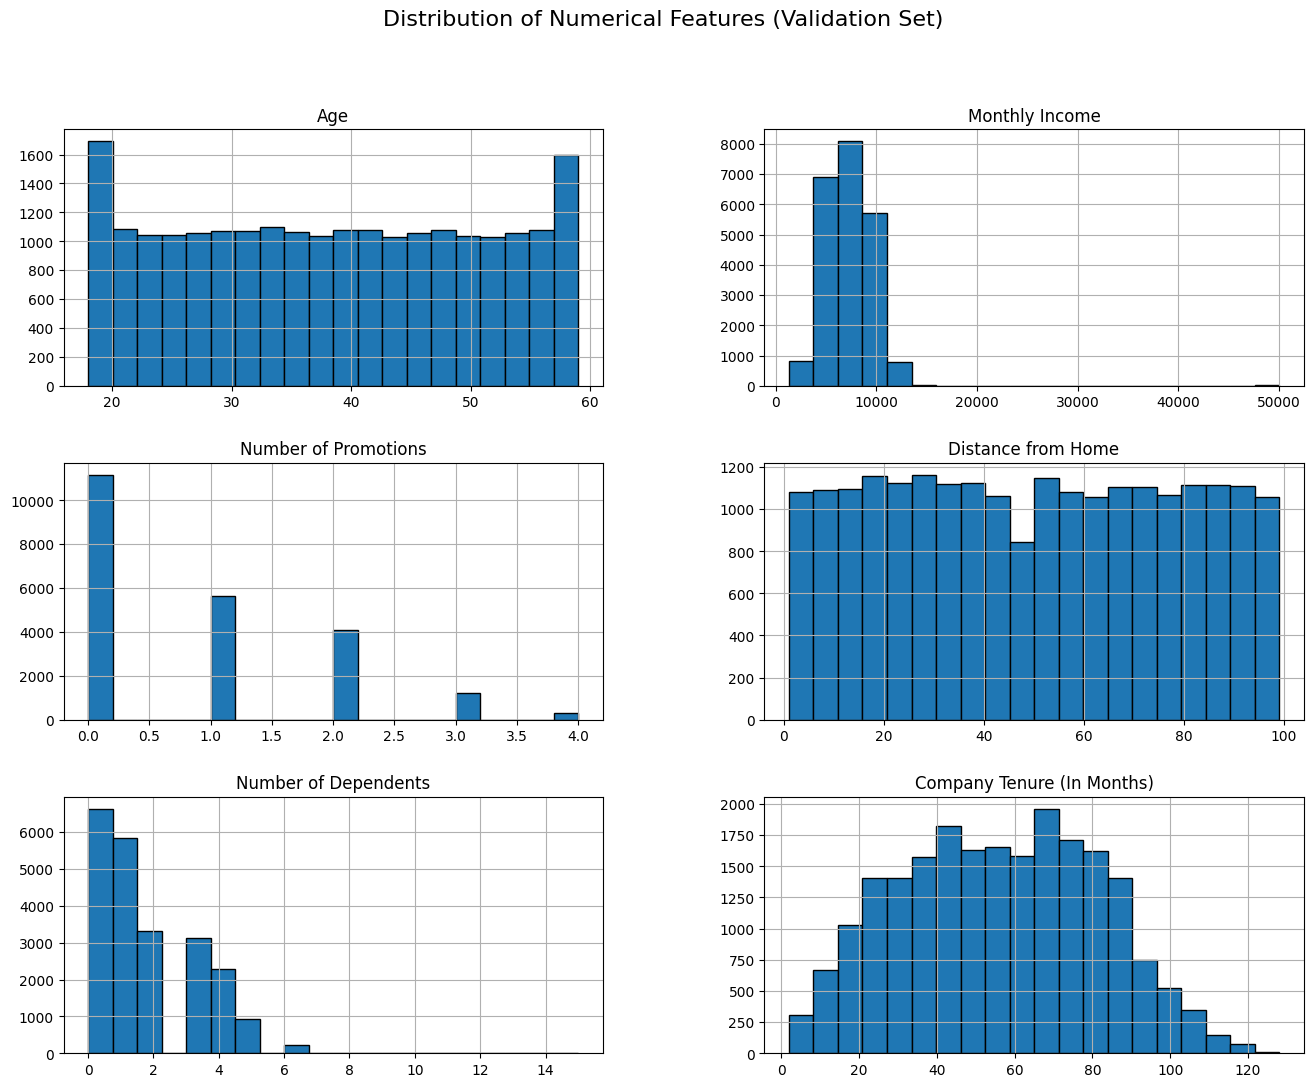

In [ ]:
# Plot all the numerical columns to understand their distribution

X_val[numeric_cols_val].hist(bins=20, figsize=(16,12), edgecolor='black')
plt.suptitle("Distribution of Numerical Features (Validation Set)", fontsize=16)
plt.show()



### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

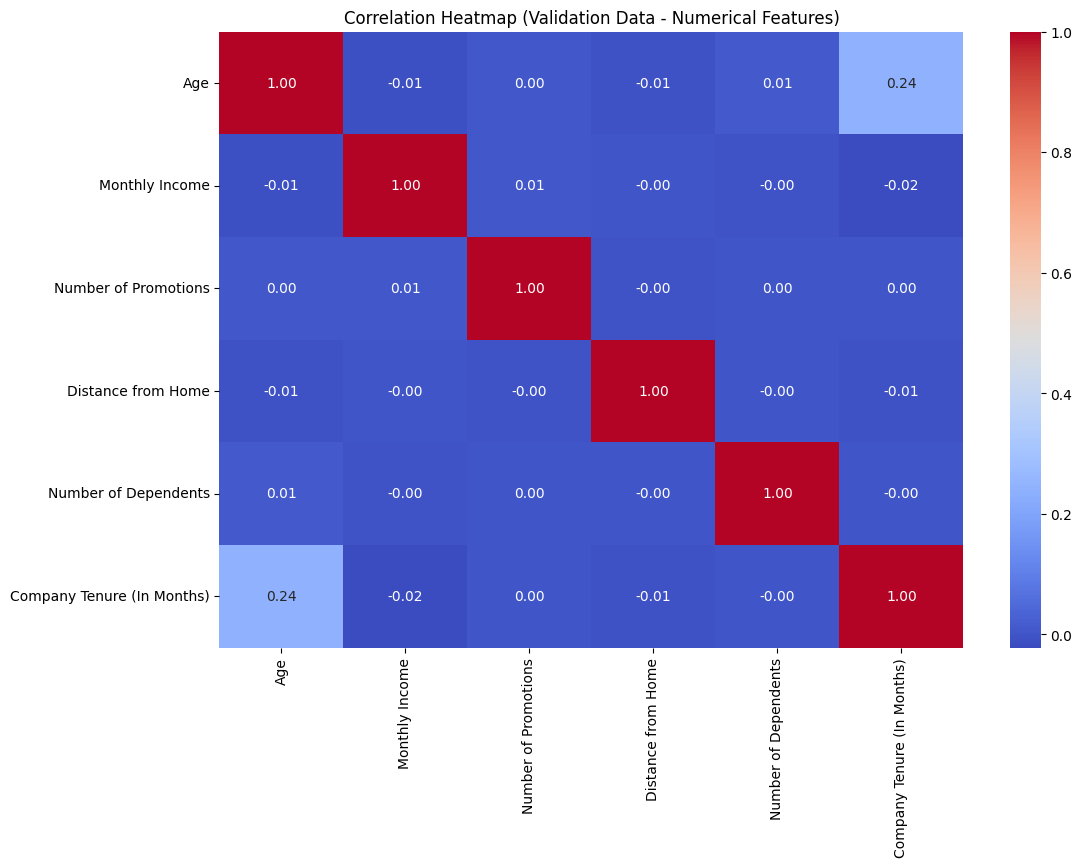

In [ ]:
# Create correlation matrix for numerical columns

corr_matrix = X_val[numeric_cols_val].corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Validation Data - Numerical Features)")
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [ ]:
# Plot a bar chart to check class balance
print("Attrition distribution in validation set (%):\n")
print(y_val.value_counts(normalize=True) * 100)


Attrition distribution in validation set (%):

Attrition
Stayed    52.526471
Left      47.473529
Name: proportion, dtype: float64


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

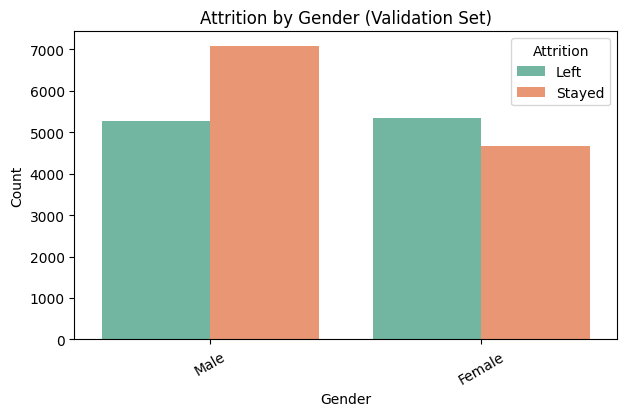

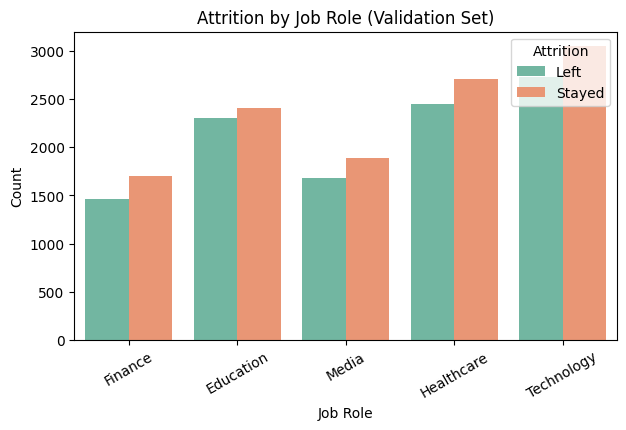

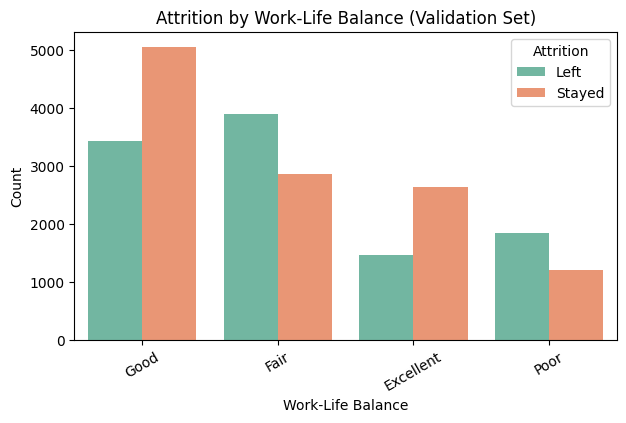

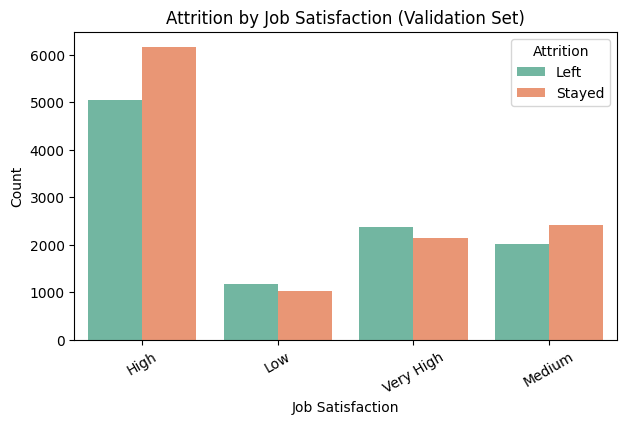

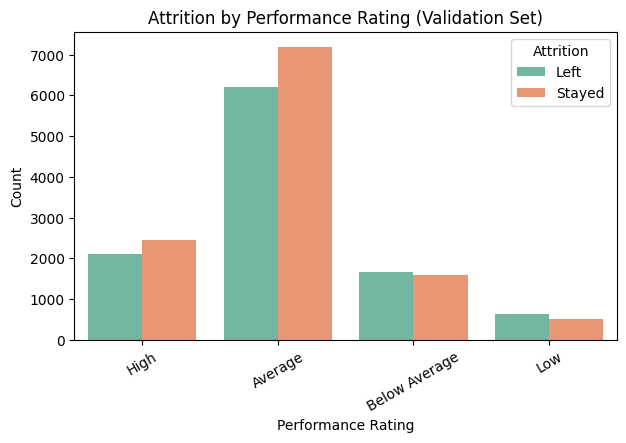

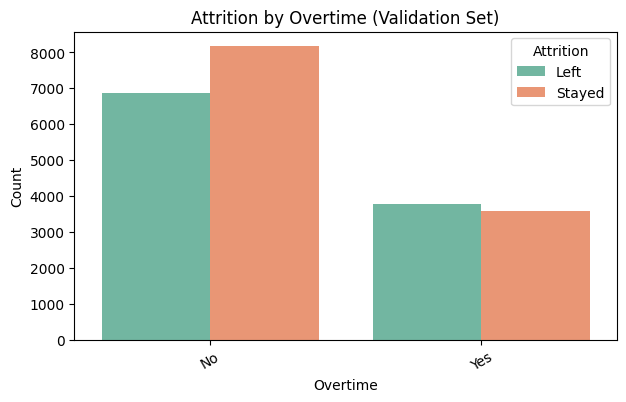

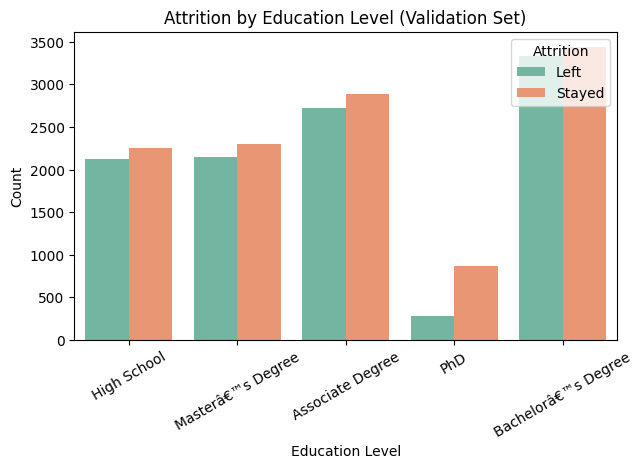

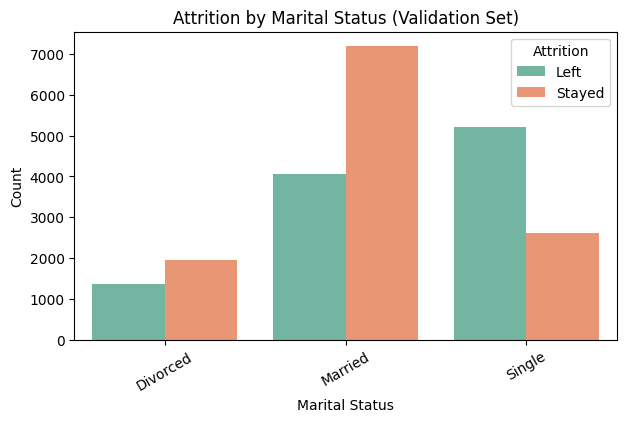

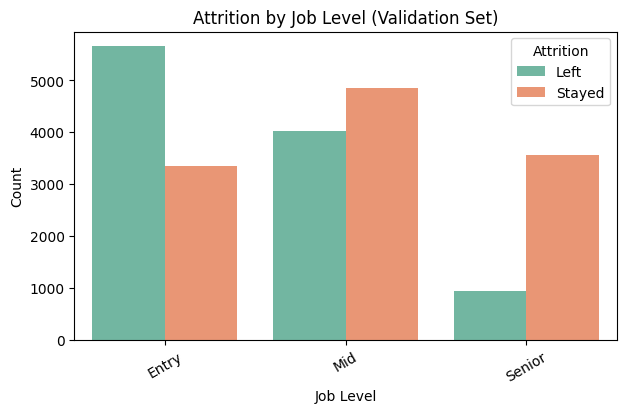

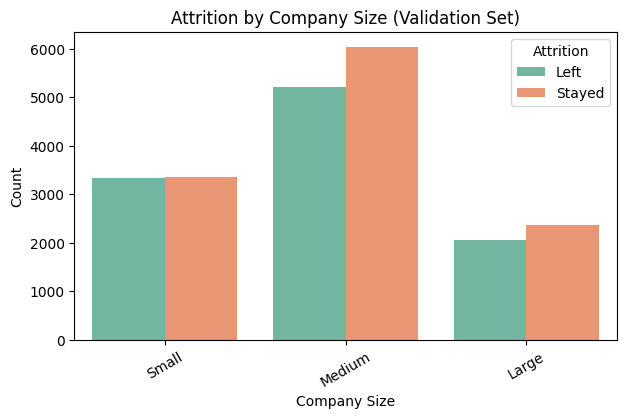

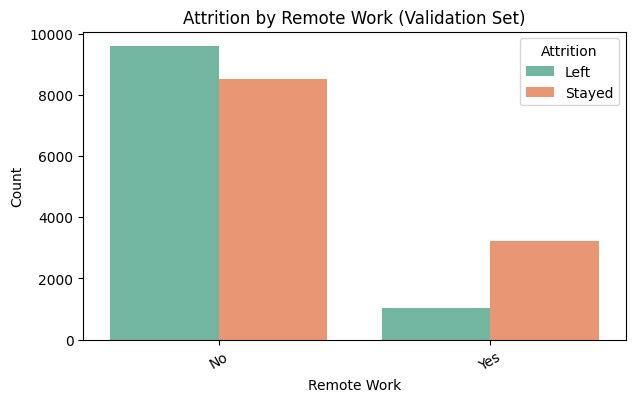

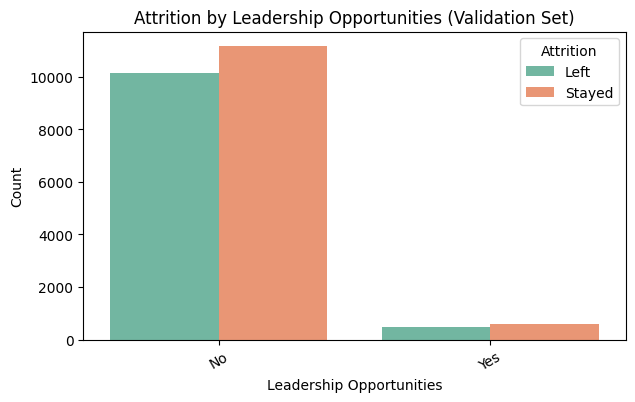

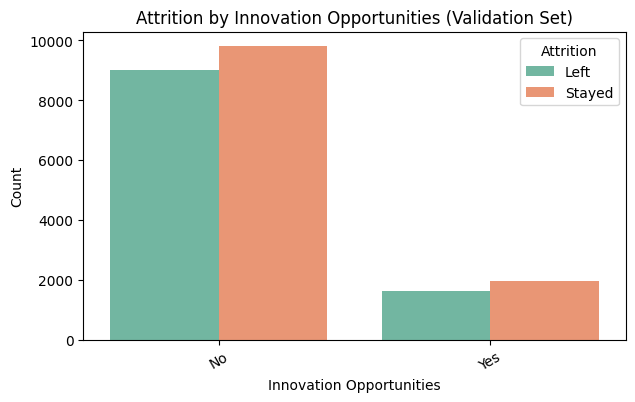

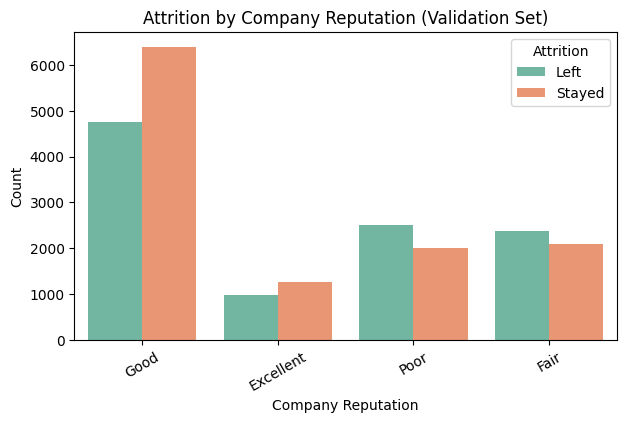

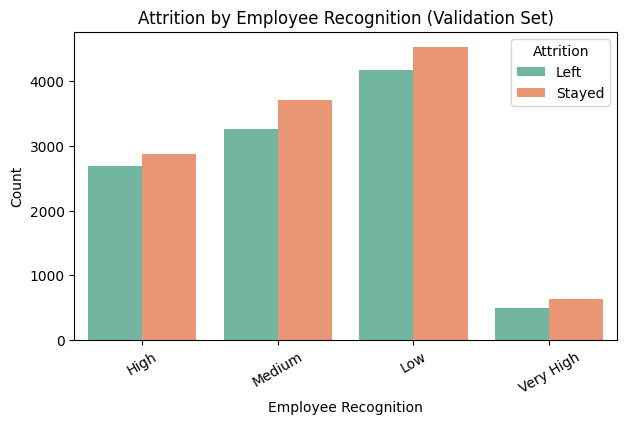

In [ ]:
# Plot distribution for each categorical column with target variable
categorical_cols_val = X_val.select_dtypes(include=['object']).columns
for col in categorical_cols_val:
    plt.figure(figsize=(7,4))
    sns.countplot(data=X_val, x=col, hue=y_val, palette="Set2")
    plt.title(f"Attrition by {col} (Validation Set)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.legend(title="Attrition", loc="upper right")
    plt.show()


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [ ]:
# Check the categorical columns
categorical_cols = employee_df_model.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns where dummy variables are required:\n")
print(categorical_cols)


Categorical columns where dummy variables are required:

['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns

# Add the results to the master DataFrame
employee_df_dummies = pd.get_dummies(employee_df_model, drop_first=True)

print("Shape before dummy encoding:", employee_df_model.shape)
print("Shape after dummy encoding:", employee_df_dummies.shape)


Shape before dummy encoding: (74610, 22)
Shape after dummy encoding: (74610, 41)


Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop the original categorical columns and check the DataFrame
categorical_cols = employee_df_model.select_dtypes(include=['object']).columns.tolist()
employee_df_numeric = employee_df_model.drop(columns=categorical_cols)

print("Shape after dropping categorical columns:", employee_df_numeric.shape)
employee_df_numeric.head()

Shape after dropping categorical columns: (74610, 6)


Age  Monthly Income  Number of Promotions  Distance from Home  \
0   31            5390                     2                22.0   
1   59            5534                     3                21.0   
2   24            8159                     0                11.0   
3   36            3989                     1                27.0   
4   56            4821                     0                71.0   

   Number of Dependents  Company Tenure (In Months)  
0                     0                        89.0  
1                     3                        21.0  
2                     3                        74.0  
3                     2                        50.0  
4                     0                        68.0

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
X = employee_df_model.drop(columns=['Attrition'])   # independent features
y = employee_df_model['Attrition']                 # target variable
X_dummies = pd.get_dummies(X, drop_first=True)

print("Shape before dummy encoding:", X.shape)
print("Shape after dummy encoding:", X_dummies.shape)
X_dummies.head()

# Add the results to the master DataFrame
employee_df_final = pd.concat([X_dummies, y], axis=1)


Shape before dummy encoding: (74610, 21)
Shape after dummy encoding: (74610, 40)


Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop categorical columns and check the DataFrame
categorical_cols = employee_df_model.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to drop:", categorical_cols)

# Drop categorical columns
employee_df_no_cat = employee_df_model.drop(columns=categorical_cols)

print("Shape before dropping categorical columns:", employee_df_model.shape)
print("Shape after dropping categorical columns:", employee_df_no_cat.shape)
employee_df_no_cat.head()


Categorical columns to drop: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
Shape before dropping categorical columns: (74610, 22)
Shape after dropping categorical columns: (74610, 6)


Age  Monthly Income  Number of Promotions  Distance from Home  \
0   31            5390                     2                22.0   
1   59            5534                     3                21.0   
2   24            8159                     0                11.0   
3   36            3989                     1                27.0   
4   56            4821                     0                71.0   

   Number of Dependents  Company Tenure (In Months)  
0                     0                        89.0  
1                     3                        21.0  
2                     3                        74.0  
3                     2                        50.0  
4                     0                        68.0

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [ ]:
# Convert y_train and y_validation to DataFrame to create dummy variables
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_validation_df = pd.DataFrame(y_validation, columns=['Attrition'])

# Create dummy variables
y_train_dummies = pd.get_dummies(y_train_df, drop_first=True)
y_validation_dummies = pd.get_dummies(y_validation_df, drop_first=True)

print("Unique values in target (training):", y_train_df['Attrition'].unique())
print("y_train shape after dummy encoding:", y_train_dummies.shape)
print("y_validation shape after dummy encoding:", y_validation_dummies.shape)

y_train_dummies.head()


Unique values in target (training): ['Stayed' 'Left']
y_train shape after dummy encoding: (52227, 1)
y_validation shape after dummy encoding: (22383, 1)


Attrition_Stayed
20940              True
17495             False
28404             False
70914              True
56430              True

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
y_dummies = pd.get_dummies(employee_df_model['Attrition'], drop_first=True)

print("Original target values:", employee_df_model['Attrition'].unique())
print("After dummy encoding:")
print(y_dummies.head())


Original target values: ['Stayed' 'Left']
After dummy encoding:
   Stayed
0    True
1    True
2    True
3    True
4    True


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
y_validation_df = pd.DataFrame(y_validation, columns=['Attrition'])
y_validation_dummies = pd.get_dummies(y_validation_df, drop_first=True)

print("Original Attrition values in validation set:", y_validation_df['Attrition'].unique())
print("Shape after dummy encoding:", y_validation_dummies.shape)
y_validation_dummies.head()


Original Attrition values in validation set: ['Left' 'Stayed']
Shape after dummy encoding: (22383, 1)


Attrition_Stayed
61298             False
46813              True
37033             False
41834              True
25905              True

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [ ]:
# Drop redundant columns from both train and validation
redundant_cols = ['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours']

# Drop from training and validation sets
X_train_clean = X_train.drop(columns=redundant_cols, errors='ignore')
X_validation_clean = X_validation.drop(columns=redundant_cols, errors='ignore')

print("Training set shape before:", X_train.shape, "after:", X_train_clean.shape)
print("Validation set shape before:", X_validation.shape, "after:", X_validation_clean.shape)


Training set shape before: (52227, 21) after: (52227, 21)
Validation set shape before: (22383, 21) after: (22383, 21)


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler


6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [ ]:
# Scale the numeric features present in the training set
scaler = StandardScaler()
numeric_cols = X_train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numeric_cols)
X_train_scaled = X_train_clean.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_clean[numeric_cols])
print("Training set after scaling:")
print(X_train_scaled.head())

# Scale the numerical features present in the validation set
X_validation_scaled = X_validation_clean.copy()
X_validation_scaled[numeric_cols] = scaler.transform(X_validation_clean[numeric_cols])
print("\nValidation set after scaling:")
print(X_validation_scaled.head())


Numerical columns: ['Age', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']
Training set after scaling:
            Age  Gender    Job Role  Monthly Income Work-Life Balance  \
20940 -1.127561  Female   Education       -1.204700              Good   
17495 -1.044579    Male  Healthcare        0.864966              Fair   
28404 -0.297739  Female   Education       -0.741193         Excellent   
70914 -1.459489    Male  Healthcare        0.349660              Good   
56430  1.195939    Male   Education       -0.510974              Fair   

      Job Satisfaction Performance Rating  Number of Promotions Overtime  \
20940             High               High              1.169352       No   
17495           Medium            Average             -0.836255       No   
28404             High            Average             -0.836255      Yes   
70914             High            Average             -0.836255       No   
56430   

[link text](https://)## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, solver='liblinear')


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [ ]:
# Import RFE and select 15 variables
X_train_ready = pd.get_dummies(X_train, drop_first=True)
X_validation_ready = pd.get_dummies(X_validation, drop_first=True)

# Step 2: Align columns (important in case train & validation differ)
X_train_ready, X_validation_ready = X_train_ready.align(X_validation_ready, join='left', axis=1, fill_value=0)

# Step 3: Impute missing values (only numeric now)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_ready),
                               columns=X_train_ready.columns,
                               index=X_train_ready.index)

X_validation_imputed = pd.DataFrame(imputer.transform(X_validation_ready),
                                    columns=X_validation_ready.columns,
                                    index=X_validation_ready.index)

# Step 4: Run RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, solver="lbfgs")

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train_imputed, y_train_dummies.values.ravel())

# Step 5: Selected features
selected_features = X_train_imputed.columns[rfe.support_].tolist()
print("Top 15 Selected Features:")
print(selected_features)


Top 15 Selected Features:
['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


In [ ]:
# Display the features selected by RFE
selected_features = X_train_imputed.columns[rfe.support_]

print("Features selected by RFE (Top 15):")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")


Features selected by RFE (Top 15):
1. Gender_Male
2. Work-Life Balance_Fair
3. Work-Life Balance_Poor
4. Job Satisfaction_Low
5. Job Satisfaction_Very High
6. Performance Rating_Below Average
7. Performance Rating_Low
8. Overtime_Yes
9. Education Level_PhD
10. Marital Status_Single
11. Job Level_Mid
12. Job Level_Senior
13. Remote Work_Yes
14. Company Reputation_Fair
15. Company Reputation_Poor


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [ ]:
# Put columns selected by RFE into variable 'col'
col = X_train_imputed.columns[rfe.support_].tolist()

print("Selected Features stored in variable 'col':")
print(col)


Selected Features stored in variable 'col':
['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [ ]:
# Select only the columns selected by RFE
X_train_rfe = X_train_imputed[col]
X_validation_rfe = X_validation_imputed[col]

In [ ]:
# View the training data
print("Shape of X_train_rfe:", X_train_rfe.shape)
print("Shape of X_validation_rfe:", X_validation_rfe.shape)


Shape of X_train_rfe: (52227, 15)
Shape of X_validation_rfe: (22383, 15)


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import statsmodels and add constant to training set

import statsmodels.api as sm

X_train_rfe_const = sm.add_constant(X_train_rfe)

print("Shape after adding constant:", X_train_rfe_const.shape)
X_train_rfe_const.head()


Shape after adding constant: (52227, 16)


const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
20940    1.0          0.0                     0.0                     0.0   
17495    1.0          1.0                     1.0                     0.0   
28404    1.0          0.0                     0.0                     0.0   
70914    1.0          1.0                     0.0                     0.0   
56430    1.0          1.0                     1.0                     0.0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
20940                   0.0                         0.0   
17495                   0.0                         0.0   
28404                   0.0                         0.0   
70914                   0.0                         0.0   
56430                   0.0                         0.0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
20940                               0.0                     0.0           0.0   
17495                               0.0                     0.0           0.0   
28404                               0.0                     0.0           1.0   
70914                               0.0                     0.0           0.0   
56430                               0.0                     0.0           0.0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
20940                  0.0                    1.0            0.0   
17495                  1.0                    0.0            0.0   
28404                  0.0                    1.0            1.0   
70914                  0.0                    0.0            1.0   
56430                  0.0                    0.0            0.0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
20940               1.0              0.0                      0.0   
17495               0.0              0.0                      0.0   
28404               0.0              0.0                      0.0   
70914               0.0              0.0                      0.0   
56430               0.0              0.0                      0.0   

       Company Reputation_Poor  
20940                      0.0  
17495                      0.0  
28404                      0.0  
70914                      0.0  
56430                      0.0

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [ ]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logit_model = sm.Logit(y_train_dummies, X_train_rfe_const).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.505352
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52211
Method:                           MLE   Df Model:                           15
Date:                Mon, 25 Aug 2025   Pseudo R-squ.:                  0.2696
Time:                        06:51:11   Log-Likelihood:                -26393.
converged:                       True   LL-Null:                       -36134.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2304      0.028      8.36

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_rfe_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe_const.values, i)
                   for i in range(X_train_rfe_const.shape[1])]

vif_data


Feature       VIF
0                              const  7.189941
1                        Gender_Male  1.000381
2             Work-Life Balance_Fair  1.076713
3             Work-Life Balance_Poor  1.076688
4               Job Satisfaction_Low  1.029559
5         Job Satisfaction_Very High  1.029529
6   Performance Rating_Below Average  1.009494
7             Performance Rating_Low  1.009900
8                       Overtime_Yes  1.000330
9                Education Level_PhD  1.000265
10             Marital Status_Single  1.000406
11                     Job Level_Mid  1.202781
12                  Job Level_Senior  1.202642
13                   Remote Work_Yes  1.000284
14           Company Reputation_Fair  1.067554
15           Company Reputation_Poor  1.067604

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [ ]:
# Predict the probabilities on the training set
y_train_pred_prob = logit_model.predict(X_train_rfe_const)
y_train_pred_prob.head()


20940    0.745185
17495    0.782195
28404    0.300250
70914    0.854915
56430    0.433128
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [ ]:
# Reshape it into an array
y_train_pred_prob_array = np.array(y_train_pred_prob).reshape(-1, 1)
y_train_pred_prob_array[:5]

array([[0.74518496],
       [0.78219455],
       [0.30024985],
       [0.85491475],
       [0.43312775]])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [ ]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
actual_stayed = y_train_dummies.values.ravel()   # flatten to 1D

# Ensure predicted probabilities are 1D
predicted_probs = y_train_pred_prob_array.flatten()

# Create DataFrame
train_results = pd.DataFrame({
    "Actual_Stayed": actual_stayed,
    "Predicted_Prob": predicted_probs
})

train_results.head()


Actual_Stayed  Predicted_Prob
0           True        0.745185
1          False        0.782195
2          False        0.300250
3           True        0.854915
4           True        0.433128

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [ ]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_results["Predicted"] = (train_results["Predicted_Prob"] > 0.5).astype(int)

train_results.head()


Actual_Stayed  Predicted_Prob  Predicted
0           True        0.745185          1
1          False        0.782195          1
2          False        0.300250          0
3           True        0.854915          1
4           True        0.433128          0

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
# Check the overall accuracy
train_accuracy = accuracy_score(train_results["Actual_Stayed"], train_results["Predicted"])
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.7382771363471001


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [ ]:

# Create confusion matrix
train_results = pd.DataFrame({
    "Actual": y_train_dummies.values.ravel(),              # ground truth
    "Predicted_Prob": y_train_pred_prob_array.flatten()         # probabilities
})

# Add binary prediction column
train_results["Predicted"] = (train_results["Predicted_Prob"] > 0.5).astype(int)

# Now create the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_results["Actual"], train_results["Predicted"])
cm_df = pd.DataFrame(cm,
                     index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"])

print("\nConfusion Matrix:")
print(cm_df)



Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        17794         6999
Actual 1         6670        20764


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix(
    train_results["Actual"],
    train_results["Predicted"]
).ravel()

# Assign to variables
true_positive = tp
true_negative = tn
false_positive = fp
false_negative = fn

print("True Positive:", true_positive)
print("True Negative:", true_negative)
print("False Positive:", false_positive)
print("False Negative:", false_negative)


True Positive: 20764
True Negative: 17794
False Positive: 6999
False Negative: 6670


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative)
print("Sensitivity (Recall):", sensitivity)


Sensitivity (Recall): 0.7568710359408034


In [ ]:
# Calculate specificity
specificity = true_negative / (true_negative + false_positive)
print("Specificity (TNR):", specificity)

Specificity (TNR): 0.7177025773403783


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [ ]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
print("Precision:", precision)


Precision: 0.7479018838021828


In [ ]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
print("Recall:", recall)


Recall: 0.7568710359408034


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [ ]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc(y_true, y_pred_probs, dataset_name="Dataset", positive_label="Left"):
    """
    Plot ROC curve and return (auc, fpr, tpr, thresholds).
    """
    # Convert y_true to binary {0,1} if needed
    y_true = np.asarray(y_true)
    if y_true.dtype.kind not in {"i", "u", "b"}:
        # Assume string/object labels; map positive_label->1, others->0
        y_bin = (y_true == positive_label).astype(int)
    else:
        y_bin = y_true

    # Compute ROC points and AUC
    fpr, tpr, thresholds = roc_curve (y_bin, y_pred_probs)
    auc_score = roc_auc_score(y_bin, y_pred_probs)

    # Plot
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, lw=2, label=f"ROC (AUC = {auc_score:.3f})")
    plt.plot([0,1], [0,1], lw=2, linestyle="--", label="Random")
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.title(f"ROC Curve — {dataset_name}")
    plt.legend(loc="lower right")
    plt.show()

    return auc_score, fpr, tpr, thresholds



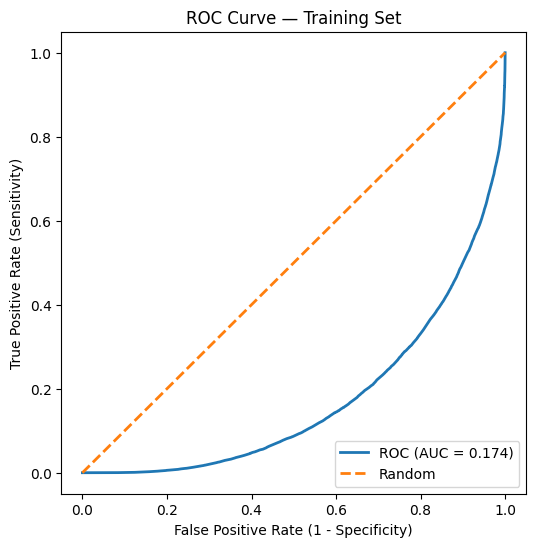

Training AUC: 0.174


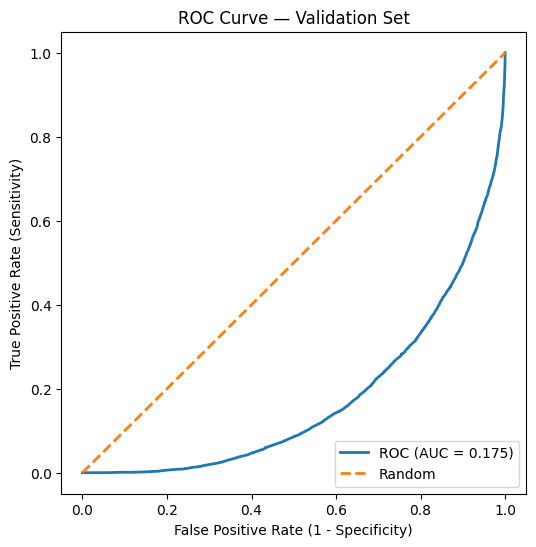

Validation AUC: 0.175


In [ ]:
# Call the ROC function
X_train_sm = sm.add_constant(X_train_imputed[selected_features], has_constant="add")
y_train_pred_probs = logit_model.predict(X_train_sm)

train_auc, fpr_train, tpr_train, thr_train = plot_roc(
    y_train, y_train_pred_probs, dataset_name="Training Set", positive_label="Left"
)

print(f"Training AUC: {train_auc:.3f}")

# --- Validation ROC ---
X_val_sm = sm.add_constant(X_validation_imputed[selected_features], has_constant="add")
y_val_pred_probs = logit_model.predict(X_val_sm)

val_auc, fpr_val, tpr_val, thr_val = plot_roc(
    y_validation, y_val_pred_probs, dataset_name="Validation Set", positive_label="Left"
)

print(f"Validation AUC: {val_auc:.3f}")

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [ ]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
X_train_sm = sm.add_constant(X_train_imputed[selected_features], has_constant="add")
y_train_pred_probs = logit_model.predict(X_train_sm)
y_train_bin = y_train.replace({"Stayed": 0, "Left": 1}).astype(int)
train_preds = pd.DataFrame({
    "Actual": y_train_bin.values,
    "Prob":   y_train_pred_probs.values
})

# Create columns for different cutoffs ---
cutoffs = [0.30, 0.40, 0.50, 0.60, 0.70]  # adjust as you like
for c in cutoffs:
    col_name = f"Pred_{str(c).replace('.','_')}"
    train_preds[col_name] = (train_preds["Prob"] >= c).astype(int)

# Peek
train_preds.head()


Actual      Prob  Pred_0_3  Pred_0_4  Pred_0_5  Pred_0_6  Pred_0_7
0       0  0.745185         1         1         1         1         1
1       1  0.782195         1         1         1         1         1
2       1  0.300250         1         0         0         0         0
3       0  0.854915         1         1         1         1         1
4       0  0.433128         1         1         0         0         0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [ ]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

# Convert target labels to binary: Stayed=0, Left=1
y_train_bin = y_train.replace({"Stayed": 0, "Left": 1}).astype(int)

# Predicted probabilities from logistic regression model
y_train_pred_probs = logit_model.predict(X_train_sm)

# Define probability cutoffs
cutoffs = [i/10 for i in range(1,10)]   # 0.1 to 0.9

# Collect metrics for each cutoff
rows = []
for c in cutoffs:
    y_pred = (y_train_pred_probs >= c).astype(int)
    rows.append({
        "Cutoff": c,
        "Accuracy": accuracy_score(y_train_bin, y_pred),
        "Sensitivity (Recall)": recall_score(y_train_bin, y_pred),
        "Specificity": specificity_score(y_train_bin, y_pred)
    })

# Create DataFrame
cutoff_df = pd.DataFrame(rows)
print(cutoff_df)


   Cutoff  Accuracy  Sensitivity (Recall)  Specificity
0     0.1  0.408084              0.854919     0.004265
1     0.2  0.340265              0.677611     0.035394
2     0.3  0.294828              0.521478     0.089998
3     0.4  0.269095              0.394991     0.155318
4     0.5  0.261723              0.282297     0.243129
5     0.6  0.269133              0.179002     0.350587
6     0.7  0.294254              0.104747     0.465517
7     0.8  0.339288              0.044851     0.605380
8     0.9  0.411798              0.007663     0.777029


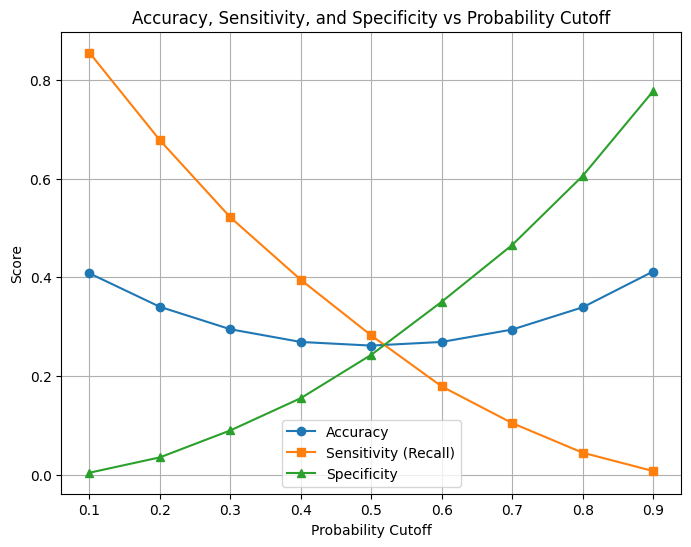

In [ ]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(8,6))
plt.plot(cutoff_df["Cutoff"], cutoff_df["Accuracy"], marker="o", label="Accuracy")
plt.plot(cutoff_df["Cutoff"], cutoff_df["Sensitivity (Recall)"], marker="s", label="Sensitivity (Recall)")
plt.plot(cutoff_df["Cutoff"], cutoff_df["Specificity"], marker="^", label="Specificity")

plt.xlabel("Probability Cutoff")
plt.ylabel("Score")
plt.title("Accuracy, Sensitivity, and Specificity vs Probability Cutoff")
plt.grid(True)
plt.legend(loc="best")
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [ ]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = 0.4
train_results = pd.DataFrame({
    "Actual": y_train.replace({"Stayed": 0, "Left": 1}).astype(int).values,
    "Predicted_Prob": y_train_pred_probs
})
train_results["Final_Prediction"] = (train_results["Predicted_Prob"] >= optimal_cutoff).astype(int)

train_results.head()


Actual  Predicted_Prob  Final_Prediction
20940       0        0.745185                 1
17495       1        0.782195                 1
28404       1        0.300250                 0
70914       0        0.854915                 1
56430       0        0.433128                 1

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [ ]:
# Calculate the accuracy

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_results["Actual"], train_results["Final_Prediction"])
print("Model Accuracy at Optimal Cutoff:", accuracy)


Model Accuracy at Optimal Cutoff: 0.26909452964941505


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [ ]:
# Create the confusion matrix once again
cm = confusion_matrix(train_results["Actual"], train_results["Final_Prediction"])
cm_df = pd.DataFrame(cm,
                     index=["Actual Stayed (0)", "Actual Left (1)"],
                     columns=["Predicted Stayed (0)", "Predicted Left (1)"])

print("\nConfusion Matrix at Optimal Cutoff:")
print(cm_df)



Confusion Matrix at Optimal Cutoff:
                   Predicted Stayed (0)  Predicted Left (1)
Actual Stayed (0)                  4261               23173
Actual Left (1)                   15000                9793


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
cm = confusion_matrix(train_results["Actual"], train_results["Final_Prediction"])
tn, fp, fn, tp = cm.ravel()

# Assign to variables
true_negative = tn
false_positive = fp
false_negative = fn
true_positive = tp

print("True Negative (TN):", true_negative)
print("False Positive (FP):", false_positive)
print("False Negative (FN):", false_negative)
print("True Positive (TP):", true_positive)


True Negative (TN): 4261
False Positive (FP): 23173
False Negative (FN): 15000
True Positive (TP): 9793


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Sensitivity

sensitivity = true_positive / (true_positive + false_negative)
print("Sensitivity:", sensitivity)


Sensitivity: 0.39499052151817043


In [ ]:
# Calculate Specificity
specificity = true_negative / (true_negative + false_positive)
print("Specificity:", specificity)


Specificity: 0.15531821826930087


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Precision
precision = true_positive / (true_positive + false_positive)
print("Precision:", precision)


Precision: 0.29706364132742824


In [ ]:
# Calculate Recall
recall = true_positive / (true_positive + false_negative)
print("Recall:", recall)


Recall: 0.39499052151817043


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [ ]:
# Check actual and predicted values from initial model
y_train_pred_probs.head()


20940    0.745185
17495    0.782195
28404    0.300250
70914    0.854915
56430    0.433128
dtype: float64

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

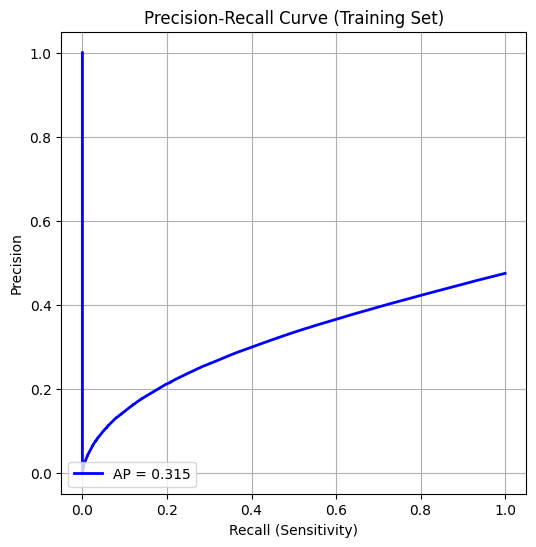

In [ ]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
y_train_bin = y_train.replace({"Stayed": 0, "Left": 1}).astype(int)

# Get predicted probabilities (positive class)
y_train_pred_probs = logit_model.predict(X_train_sm)

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_train_bin, y_train_pred_probs)

# Compute average precision score (area under PR curve)
avg_precision = average_precision_score(y_train_bin, y_train_pred_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color="blue", lw=2, label=f"AP = {avg_precision:.3f}")
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Training Set)")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()



## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [ ]:
# Select the relevant features for validation set
X_val_rfe = X_validation_imputed[selected_features]

# Add constant for statsmodels
X_val_sm = sm.add_constant(X_val_rfe, has_constant="add")

print("Validation set shape (with selected features):", X_val_sm.shape)
X_val_sm.head()


Validation set shape (with selected features): (22383, 16)


const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
61298    1.0          1.0                     0.0                     0.0   
46813    1.0          1.0                     0.0                     0.0   
37033    1.0          1.0                     1.0                     0.0   
41834    1.0          1.0                     1.0                     0.0   
25905    1.0          1.0                     0.0                     0.0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
61298                   0.0                         0.0   
46813                   1.0                         0.0   
37033                   0.0                         1.0   
41834                   0.0                         0.0   
25905                   0.0                         0.0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
61298                               0.0                     0.0           0.0   
46813                               0.0                     0.0           0.0   
37033                               1.0                     0.0           0.0   
41834                               0.0                     0.0           0.0   
25905                               0.0                     0.0           1.0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
61298                  0.0                    0.0            0.0   
46813                  0.0                    0.0            1.0   
37033                  0.0                    0.0            0.0   
41834                  0.0                    0.0            1.0   
25905                  1.0                    0.0            0.0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
61298               0.0              0.0                      0.0   
46813               0.0              0.0                      0.0   
37033               0.0              0.0                      0.0   
41834               0.0              0.0                      0.0   
25905               0.0              0.0                      0.0   

       Company Reputation_Poor  
61298                      0.0  
46813                      0.0  
37033                      1.0  
41834                      0.0  
25905                      1.0

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation
X_val_rfe = X_validation_imputed[selected_features]

# Add constant
X_val_sm = sm.add_constant(X_val_rfe, has_constant="add")

print("Validation set shape (with constant added):", X_val_sm.shape)
X_val_sm.head()


Validation set shape (with constant added): (22383, 16)


const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
61298    1.0          1.0                     0.0                     0.0   
46813    1.0          1.0                     0.0                     0.0   
37033    1.0          1.0                     1.0                     0.0   
41834    1.0          1.0                     1.0                     0.0   
25905    1.0          1.0                     0.0                     0.0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
61298                   0.0                         0.0   
46813                   1.0                         0.0   
37033                   0.0                         1.0   
41834                   0.0                         0.0   
25905                   0.0                         0.0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
61298                               0.0                     0.0           0.0   
46813                               0.0                     0.0           0.0   
37033                               1.0                     0.0           0.0   
41834                               0.0                     0.0           0.0   
25905                               0.0                     0.0           1.0   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
61298                  0.0                    0.0            0.0   
46813                  0.0                    0.0            1.0   
37033                  0.0                    0.0            0.0   
41834                  0.0                    0.0            1.0   
25905                  1.0                    0.0            0.0   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
61298               0.0              0.0                      0.0   
46813               0.0              0.0                      0.0   
37033               0.0              0.0                      0.0   
41834               0.0              0.0                      0.0   
25905               0.0              0.0                      0.0   

       Company Reputation_Poor  
61298                      0.0  
46813                      0.0  
37033                      1.0  
41834                      0.0  
25905                      1.0

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

y_val_pred_probs = logit_model.predict(X_val_sm)
y_validation_pred = (y_val_pred_probs >= 0.5).astype(int)
# View predictions
print("First 10 predictions:")
print(y_validation_pred[:10])


First 10 predictions:
61298    1
46813    1
37033    0
41834    1
25905    1
69643    0
2481     1
3327     0
41827    0
28541    1
dtype: int64


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [ ]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=["Predicted"])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_validation.replace({"Stayed": 0, "Left": 1}).astype(int).values, columns=["Actual"])
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)
validation_results = pd.concat([actual, predicted_probability], axis=1)
print(validation_results.head())


   Actual  Predicted
0       1          1
1       0          1
2       1          0
3       0          1
4       0          1


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
optimal_cutoff = 0.4
y_val_pred_probs = logit_model.predict(X_val_sm)
final_prediction = (y_val_pred_probs >= optimal_cutoff).astype(int)
actual = pd.DataFrame(y_validation.replace({"Stayed": 0, "Left": 1}).astype(int).values, columns=["Actual"])
validation_results = pd.DataFrame({
    "Actual": actual["Actual"].values,
    "Predicted_Prob": y_val_pred_probs.values,
    "final_prediction": final_prediction
})
print(validation_results.head())
# Check the DataFrame
print(validation_results.head())
print("\nShape of validation_results:", validation_results.shape)
print("\nInfo:")
print(validation_results.info())
print("\nActual value counts:")
print(validation_results["Actual"].value_counts())
print("\nFinal Prediction value counts:")
print(validation_results["final_prediction"].value_counts())


       Actual  Predicted_Prob  final_prediction
61298       1        0.691241                 1
46813       0        0.790353                 1
37033       1        0.138363                 0
41834       0        0.667888                 1
25905       0        0.779157                 1
       Actual  Predicted_Prob  final_prediction
61298       1        0.691241                 1
46813       0        0.790353                 1
37033       1        0.138363                 0
41834       0        0.667888                 1
25905       0        0.779157                 1

Shape of validation_results: (22383, 3)

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 22383 entries, 61298 to 29683
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Actual            22383 non-null  int64  
 1   Predicted_Prob    22383 non-null  float64
 2   final_prediction  22383 non-null  int64  
dtypes: float64(1), int64(2)
memor

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [ ]:
# Calculate the overall accuracy
accuracy = accuracy_score(validation_results["Actual"], validation_results["final_prediction"])
print("Accuracy:", accuracy)


Accuracy: 0.27159004601706654


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [ ]:
# Create confusion matrix
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_val = accuracy_score(validation_results["Actual"], validation_results["final_prediction"])

print("Validation Accuracy:", accuracy_val)
print("Validation Accuracy (%):", round(accuracy_val * 100, 2))


Validation Accuracy: 0.27159004601706654
Validation Accuracy (%): 27.16


In [ ]:
# Create variables for true positive, true negative, false positive and false negative
from sklearn.metrics import confusion_matrix
cm_val = confusion_matrix(validation_results["Actual"], validation_results["final_prediction"])
tn, fp, fn, tp = cm_val.ravel()
true_negative_val = tn
false_positive_val = fp
false_negative_val = fn
true_positive_val = tp

print("True Negative (TN):", true_negative_val)
print("False Positive (FP):", false_positive_val)
print("False Negative (FN):", false_negative_val)
print("True Positive (TP):", true_positive_val)


True Negative (TN): 1854
False Positive (FP): 9903
False Negative (FN): 6401
True Positive (TP): 4225


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity_val = true_positive_val / (true_positive_val + false_negative_val)
print("Sensitivity (Recall) on Validation Set:", sensitivity_val)


Sensitivity (Recall) on Validation Set: 0.39760963674007155


In [ ]:
# Calculate specificity
specificity_val = true_negative_val / (true_negative_val + false_positive_val)
print("Specificity on Validation Set:", specificity_val)


Specificity on Validation Set: 0.15769328910436337


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision
precision_val = true_positive_val / (true_positive_val + false_positive_val)
print("Precision on Validation Set:", precision_val)


Precision on Validation Set: 0.2990515288788222


In [ ]:
# Calculate recall
recall_val = true_positive_val / (true_positive_val + false_negative_val)
print("Recall (Sensitivity) on Validation Set:", recall_val)


Recall (Sensitivity) on Validation Set: 0.39760963674007155


## Conclusion

